# 7.感知机梯度传播推导

## P29. 单一输出感知机1

In [2]:
import torch
import torch.autograd
from torch.nn import functional as F 

In [3]:
x = torch.randn(1,10)
w = torch.randn(1,10, requires_grad= True)

In [5]:
o = torch.sigmoid(x@w.t())
print(o.shape)
o

torch.Size([1, 1])


tensor([[0.8544]], grad_fn=<SigmoidBackward>)

In [6]:
loss = F.mse_loss(torch.ones(1,1), o)
loss

tensor(0.0212, grad_fn=<MeanBackward0>)

In [7]:
loss.backward()

In [8]:
w.grad

tensor([[ 0.0164, -0.0120,  0.0397, -0.0446,  0.0184, -0.0644, -0.0159, -0.0019,
         -0.0909,  0.0594]])

## 少. 多输出Loss层2

In [10]:
x = torch.tensor(1)

w1 = torch.tensor(2., requires_grad=True)
b1 = torch.tensor(1)

w2 = torch.tensor(2., requires_grad=True)
b2 = torch.tensor(1)

In [12]:
y1 = x*w1 + b1 
y2 = y1*w2 +b2 

y1, y2 

(tensor(3., grad_fn=<AddBackward0>), tensor(7., grad_fn=<AddBackward0>))

In [20]:
test1 = torch.autograd.grad(y2, [y1], retain_graph =True)
print(test[0])
print(type(test1))
test

tensor(2.)
<class 'tuple'>


(tensor(2.),)

In [18]:
test2 = torch.autograd.grad(y1,[w1], retain_graph=True)
test2

(tensor(1.),)

In [21]:
test3 = torch.autograd.grad(y2, [w1], retain_graph=True)
test3

(tensor(2.),)

In [22]:
dy2_dy1 = test1[0]
dy2_dy1

tensor(2.)

In [23]:
dy1_dw1 = test2[0]
dy1_dw1

tensor(1.)

In [24]:
dy2_dw1=test3[0]
dy2_dw1

tensor(2.)

In [25]:
dy2_dy1*dy1_dw1

tensor(2.)

In [26]:
dy2_dw1

tensor(2.)

# P30. 链式法则

## P31. MLP 反向传播

没看

# P32.  优化小实例

In [27]:
def himmelblau(x):
    return (x[0]**2 +x[1]-11)**2 +(x[0]+x[1]**2-7)**2

In [31]:
import numpy as np 

x = np.arange(-6,6,0.1)
y = np.arange(-6,6,0.1)

print("x,y range: ", x.shape, y.shape)

X,Y = np.meshgrid(x,y)

X,Y

x,y range:  (120,) (120,)


(array([[-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
        [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
        [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
        ...,
        [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
        [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9],
        [-6. , -5.9, -5.8, ...,  5.7,  5.8,  5.9]]),
 array([[-6. , -6. , -6. , ..., -6. , -6. , -6. ],
        [-5.9, -5.9, -5.9, ..., -5.9, -5.9, -5.9],
        [-5.8, -5.8, -5.8, ..., -5.8, -5.8, -5.8],
        ...,
        [ 5.7,  5.7,  5.7, ...,  5.7,  5.7,  5.7],
        [ 5.8,  5.8,  5.8, ...,  5.8,  5.8,  5.8],
        [ 5.9,  5.9,  5.9, ...,  5.9,  5.9,  5.9]]))

In [32]:
Z = himmelblau([X,Y])
Z

array([[ 890.    ,  850.8061,  815.1296, ..., 1444.0301, 1487.9296,
        1535.2061],
       [ 840.4861,  800.8162,  764.6677, ..., 1365.9682, 1409.8597,
        1457.1322],
       [ 794.6496,  754.5077,  717.8912, ..., 1292.0517, 1335.9392,
        1383.2117],
       ...,
       [1322.3501, 1254.6082, 1190.8517, ..., 1712.1122, 1782.2197,
        1856.1722],
       [1374.6496, 1306.8997, 1243.1392, ..., 1790.6197, 1861.1872,
        1935.6037],
       [1430.4861, 1362.7322, 1298.9717, ..., 1873.1322, 1944.1637,
        2019.0482]])

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline 

from mpl_toolkits.mplot3d import axes3d, Axes3D

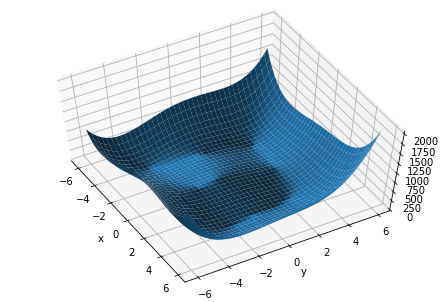

In [42]:
fig = plt.figure('himmelblau')
#ax = fig.gca(projection='3d')
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.plot_surface(X,Y,Z)
ax.view_init(60,-30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [44]:
x = torch.tensor([0.0,0.0], requires_grad=True)

optimizer = torch.optim.Adam([x], lr = 1e-3)

for step in range(200000):
    
    pred = himmelblau(x)
    
    optimizer.zero_grad()
    pred.backward()
    optimizer.step()
    
    if step%200 ==0:
        print('step {}: x={}, f(x)={}'.format(step, x.tolist(), pred.item()))

step 0: x=[0.0009999999310821295, 0.0009999999310821295], f(x)=170.0
step 200: x=[0.22140692174434662, 0.2096429467201233], f(x)=160.7888641357422
step 400: x=[0.4751032292842865, 0.4337235391139984], f(x)=147.1605987548828
step 600: x=[0.7424687743186951, 0.665006160736084], f(x)=129.6345977783203
step 800: x=[1.0105513334274292, 0.8957962989807129], f(x)=109.51009368896484
step 1000: x=[1.2714201211929321, 1.1194902658462524], f(x)=88.42720031738281
step 1200: x=[1.5200262069702148, 1.3304245471954346], f(x)=68.01787567138672
step 1400: x=[1.75287926197052, 1.5235968828201294], f(x)=49.653907775878906
step 1600: x=[1.9673454761505127, 1.6944735050201416], f(x)=34.28019714355469
step 1800: x=[2.1613240242004395, 1.8390235900878906], f(x)=22.329959869384766
step 2000: x=[2.3331806659698486, 1.9540694952011108], f(x)=13.730916023254395
step 2200: x=[2.4818475246429443, 2.037977457046509], f(x)=8.009337425231934
step 2400: x=[2.6070098876953125, 2.091456651687622], f(x)=4.474478721618652

step 27400: x=[3.0, 2.0], f(x)=0.0
step 27600: x=[3.0, 2.0], f(x)=0.0
step 27800: x=[3.0, 2.0], f(x)=0.0
step 28000: x=[3.0, 2.0], f(x)=0.0
step 28200: x=[3.0, 2.0], f(x)=0.0
step 28400: x=[3.0, 2.0], f(x)=0.0
step 28600: x=[3.0, 2.0], f(x)=0.0
step 28800: x=[3.0, 2.0], f(x)=0.0
step 29000: x=[3.0, 2.0], f(x)=0.0
step 29200: x=[3.0, 2.0], f(x)=0.0
step 29400: x=[3.0, 2.0], f(x)=0.0
step 29600: x=[3.0, 2.0], f(x)=0.0
step 29800: x=[3.0, 2.0], f(x)=0.0
step 30000: x=[3.0, 2.0], f(x)=0.0
step 30200: x=[3.0, 2.0], f(x)=0.0
step 30400: x=[3.0, 2.0], f(x)=0.0
step 30600: x=[3.0, 2.0], f(x)=0.0
step 30800: x=[3.0, 2.0], f(x)=0.0
step 31000: x=[3.0, 2.0], f(x)=0.0
step 31200: x=[3.0, 2.0], f(x)=0.0
step 31400: x=[3.0, 2.0], f(x)=0.0
step 31600: x=[3.0, 2.0], f(x)=0.0
step 31800: x=[3.0, 2.0], f(x)=0.0
step 32000: x=[3.0, 2.0], f(x)=0.0
step 32200: x=[3.0, 2.0], f(x)=0.0
step 32400: x=[3.0, 2.0], f(x)=0.0
step 32600: x=[3.0, 2.0], f(x)=0.0
step 32800: x=[3.0, 2.0], f(x)=0.0
step 33000: x=[3.0, 

step 74200: x=[3.0, 2.0], f(x)=0.0
step 74400: x=[3.0, 2.0], f(x)=0.0
step 74600: x=[3.0, 2.0], f(x)=0.0
step 74800: x=[3.0, 2.0], f(x)=0.0
step 75000: x=[3.0, 2.0], f(x)=0.0
step 75200: x=[3.0, 2.0], f(x)=0.0
step 75400: x=[3.0, 2.0], f(x)=0.0
step 75600: x=[3.0, 2.0], f(x)=0.0
step 75800: x=[3.0, 2.0], f(x)=0.0
step 76000: x=[3.0, 2.0], f(x)=0.0
step 76200: x=[3.0, 2.0], f(x)=0.0
step 76400: x=[3.0, 2.0], f(x)=0.0
step 76600: x=[3.0, 2.0], f(x)=0.0
step 76800: x=[3.0, 2.0], f(x)=0.0
step 77000: x=[3.0, 2.0], f(x)=0.0
step 77200: x=[3.0, 2.0], f(x)=0.0
step 77400: x=[3.0, 2.0], f(x)=0.0
step 77600: x=[3.0, 2.0], f(x)=0.0
step 77800: x=[3.0, 2.0], f(x)=0.0
step 78000: x=[3.0, 2.0], f(x)=0.0
step 78200: x=[3.0, 2.0], f(x)=0.0
step 78400: x=[3.0, 2.0], f(x)=0.0
step 78600: x=[3.0, 2.0], f(x)=0.0
step 78800: x=[3.0, 2.0], f(x)=0.0
step 79000: x=[3.0, 2.0], f(x)=0.0
step 79200: x=[3.0, 2.0], f(x)=0.0
step 79400: x=[3.0, 2.0], f(x)=0.0
step 79600: x=[3.0, 2.0], f(x)=0.0
step 79800: x=[3.0, 

step 120400: x=[3.0, 2.0], f(x)=0.0
step 120600: x=[3.0, 2.0], f(x)=0.0
step 120800: x=[3.0, 2.0], f(x)=0.0
step 121000: x=[3.0, 2.0], f(x)=0.0
step 121200: x=[3.0, 2.0], f(x)=0.0
step 121400: x=[3.0, 2.0], f(x)=0.0
step 121600: x=[3.0, 2.0], f(x)=0.0
step 121800: x=[3.0, 2.0], f(x)=0.0
step 122000: x=[3.0, 2.0], f(x)=0.0
step 122200: x=[3.0, 2.0], f(x)=0.0
step 122400: x=[3.0, 2.0], f(x)=0.0
step 122600: x=[3.0, 2.0], f(x)=0.0
step 122800: x=[3.0, 2.0], f(x)=0.0
step 123000: x=[3.0, 2.0], f(x)=0.0
step 123200: x=[3.0, 2.0], f(x)=0.0
step 123400: x=[3.0, 2.0], f(x)=0.0
step 123600: x=[3.0, 2.0], f(x)=0.0
step 123800: x=[3.0, 2.0], f(x)=0.0
step 124000: x=[3.0, 2.0], f(x)=0.0
step 124200: x=[3.0, 2.0], f(x)=0.0
step 124400: x=[3.0, 2.0], f(x)=0.0
step 124600: x=[3.0, 2.0], f(x)=0.0
step 124800: x=[3.0, 2.0], f(x)=0.0
step 125000: x=[3.0, 2.0], f(x)=0.0
step 125200: x=[3.0, 2.0], f(x)=0.0
step 125400: x=[3.0, 2.0], f(x)=0.0
step 125600: x=[3.0, 2.0], f(x)=0.0
step 125800: x=[3.0, 2.0], f

step 165800: x=[3.0, 2.0], f(x)=0.0
step 166000: x=[3.0, 2.0], f(x)=0.0
step 166200: x=[3.0, 2.0], f(x)=0.0
step 166400: x=[3.0, 2.0], f(x)=0.0
step 166600: x=[3.0, 2.0], f(x)=0.0
step 166800: x=[3.0, 2.0], f(x)=0.0
step 167000: x=[3.0, 2.0], f(x)=0.0
step 167200: x=[3.0, 2.0], f(x)=0.0
step 167400: x=[3.0, 2.0], f(x)=0.0
step 167600: x=[3.0, 2.0], f(x)=0.0
step 167800: x=[3.0, 2.0], f(x)=0.0
step 168000: x=[3.0, 2.0], f(x)=0.0
step 168200: x=[3.0, 2.0], f(x)=0.0
step 168400: x=[3.0, 2.0], f(x)=0.0
step 168600: x=[3.0, 2.0], f(x)=0.0
step 168800: x=[3.0, 2.0], f(x)=0.0
step 169000: x=[3.0, 2.0], f(x)=0.0
step 169200: x=[3.0, 2.0], f(x)=0.0
step 169400: x=[3.0, 2.0], f(x)=0.0
step 169600: x=[3.0, 2.0], f(x)=0.0
step 169800: x=[3.0, 2.0], f(x)=0.0
step 170000: x=[3.0, 2.0], f(x)=0.0
step 170200: x=[3.0, 2.0], f(x)=0.0
step 170400: x=[3.0, 2.0], f(x)=0.0
step 170600: x=[3.0, 2.0], f(x)=0.0
step 170800: x=[3.0, 2.0], f(x)=0.0
step 171000: x=[3.0, 2.0], f(x)=0.0
step 171200: x=[3.0, 2.0], f

In [45]:
x = torch.tensor([-100,20.0], requires_grad=True)

optimizer = torch.optim.Adam([x], lr = 1e-3)

for step in range(200000):
    
    pred = himmelblau(x)
    
    optimizer.zero_grad()
    pred.backward()
    optimizer.step()
    
    if step%200 ==0:
        print('step {}: x={}, f(x)={}'.format(step, x.tolist(), pred.item()))

step 0: x=[-99.9990005493164, 19.999000549316406], f(x)=100265928.0
step 200: x=[-99.79911041259766, 19.799880981445312], f(x)=99459600.0
step 400: x=[-99.59979248046875, 19.602739334106445], f(x)=98660568.0
step 600: x=[-99.40142822265625, 19.407424926757812], f(x)=97870304.0
step 800: x=[-99.20306396484375, 19.213773727416992], f(x)=97084952.0
step 1000: x=[-99.00492095947266, 19.02166175842285], f(x)=96305320.0
step 1200: x=[-98.8080825805664, 18.8309268951416], f(x)=95535600.0
step 1400: x=[-98.61124420166016, 18.64145278930664], f(x)=94770640.0
step 1600: x=[-98.4144058227539, 18.453105926513672], f(x)=94010368.0
step 1800: x=[-98.21756744384766, 18.265792846679688], f(x)=93254808.0
step 2000: x=[-98.02165222167969, 18.079376220703125], f(x)=92507376.0
step 2200: x=[-97.82633972167969, 17.8937931060791], f(x)=91766816.0
step 2400: x=[-97.63102722167969, 17.70895767211914], f(x)=91030824.0
step 2600: x=[-97.43571472167969, 17.524770736694336], f(x)=90299352.0
step 2800: x=[-97.2404

step 23000: x=[-77.70622253417969, -1.794994592666626], f(x)=36314644.0
step 23200: x=[-77.51396179199219, -1.9952080249786377], f(x)=35953340.0
step 23400: x=[-77.32170104980469, -2.1953344345092773], f(x)=35594700.0
step 23600: x=[-77.12944030761719, -2.395359516143799], f(x)=35238732.0
step 23800: x=[-76.93717956542969, -2.5952634811401367], f(x)=34885416.0
step 24000: x=[-76.74491882324219, -2.7950358390808105], f(x)=34534744.0
step 24200: x=[-76.55265808105469, -2.994659900665283], f(x)=34186692.0
step 24400: x=[-76.36039733886719, -3.1941192150115967], f(x)=33841256.0
step 24600: x=[-76.16813659667969, -3.393399477005005], f(x)=33498428.0
step 24800: x=[-75.97587585449219, -3.592484712600708], f(x)=33158192.0
step 25000: x=[-75.78361511230469, -3.791360378265381], f(x)=32820526.0
step 25200: x=[-75.59135437011719, -3.990009307861328], f(x)=32485430.0
step 25400: x=[-75.39909362792969, -4.188412666320801], f(x)=32152892.0
step 25600: x=[-75.20683288574219, -4.386562824249268], f(x

step 45400: x=[-56.281185150146484, -13.431614875793457], f(x)=9893721.0
step 45600: x=[-56.09121322631836, -13.403597831726074], f(x)=9760016.0
step 45800: x=[-55.901241302490234, -13.37557601928711], f(x)=9627669.0
step 46000: x=[-55.71126937866211, -13.34754753112793], f(x)=9496671.0
step 46200: x=[-55.521297454833984, -13.319511413574219], f(x)=9367013.0
step 46400: x=[-55.33132553100586, -13.291473388671875], f(x)=9238683.0
step 46600: x=[-55.141353607177734, -13.263408660888672], f(x)=9111676.0
step 46800: x=[-54.95138168334961, -13.235330581665039], f(x)=8985981.0
step 47000: x=[-54.76205062866211, -13.207316398620605], f(x)=8862001.0
step 47200: x=[-54.57284164428711, -13.179314613342285], f(x)=8739390.0
step 47400: x=[-54.38363265991211, -13.15129280090332], f(x)=8618053.0
step 47600: x=[-54.19442367553711, -13.123255729675293], f(x)=8497983.0
step 47800: x=[-54.00521469116211, -13.09519100189209], f(x)=8379167.5
step 48000: x=[-53.81600570678711, -13.067103385925293], f(x)=82

step 68000: x=[-35.10976791381836, -10.10305118560791], f(x)=1471709.0
step 68200: x=[-34.925899505615234, -10.071602821350098], f(x)=1440689.5
step 68400: x=[-34.74203109741211, -10.040074348449707], f(x)=1410161.375
step 68600: x=[-34.558162689208984, -10.008550643920898], f(x)=1380119.125
step 68800: x=[-34.37429428100586, -9.976948738098145], f(x)=1350557.25
step 69000: x=[-34.190425872802734, -9.945289611816406], f(x)=1321471.375
step 69200: x=[-34.00655746459961, -9.9135160446167], f(x)=1292855.75
step 69400: x=[-33.82292175292969, -9.881817817687988], f(x)=1264740.625
step 69600: x=[-33.63981628417969, -9.850081443786621], f(x)=1237164.125
step 69800: x=[-33.45671081542969, -9.81834888458252], f(x)=1210039.125
step 70000: x=[-33.27360534667969, -9.786541938781738], f(x)=1183361.0
step 70200: x=[-33.09049987792969, -9.754671096801758], f(x)=1157124.5
step 70400: x=[-32.90739440917969, -9.722671508789062], f(x)=1131325.125
step 70600: x=[-32.72428894042969, -9.690706253051758], f(

step 90200: x=[-15.458620071411133, -6.3233466148376465], f(x)=49445.2421875
step 90400: x=[-15.293147087097168, -6.286496639251709], f(x)=47220.58984375
step 90600: x=[-15.128015518188477, -6.249564170837402], f(x)=45074.77734375
step 90800: x=[-14.963233947753906, -6.212660789489746], f(x)=43005.828125
step 91000: x=[-14.798810005187988, -6.175689220428467], f(x)=41011.76953125
step 91200: x=[-14.63475227355957, -6.138696193695068], f(x)=39090.67578125
step 91400: x=[-14.471068382263184, -6.101593017578125], f(x)=37240.62109375
step 91600: x=[-14.30776596069336, -6.064540386199951], f(x)=35459.71484375
step 91800: x=[-14.144850730895996, -6.027401924133301], f(x)=33746.0625
step 92000: x=[-13.982331275939941, -5.990245819091797], f(x)=32097.837890625
step 92200: x=[-13.82021427154541, -5.95300817489624], f(x)=30513.228515625
step 92400: x=[-13.658506393432617, -5.915777683258057], f(x)=28990.431640625
step 92600: x=[-13.49721622467041, -5.878482341766357], f(x)=27527.712890625
step 9

step 110800: x=[-3.779858350753784, -3.2833545207977295], f(x)=1.6234425856964663e-05
step 111000: x=[-3.779552459716797, -3.283257484436035], f(x)=3.1700037652626634e-06
step 111200: x=[-3.779409885406494, -3.2832202911376953], f(x)=5.371202860260382e-07
step 111400: x=[-3.779348373413086, -3.2832000255584717], f(x)=7.937796908663586e-08
step 111600: x=[-3.7793307304382324, -3.2831954956054688], f(x)=2.270667209813837e-08
step 111800: x=[-3.7793281078338623, -3.2831785678863525], f(x)=1.7238562577404082e-08
step 112000: x=[-3.7793266773223877, -3.2832822799682617], f(x)=2.709987256821478e-07
step 112200: x=[-3.7793242931365967, -3.28328800201416], f(x)=7.125927368178964e-07
step 112400: x=[-3.7793242931365967, -3.2832043170928955], f(x)=1.604803401278332e-08
step 112600: x=[-3.779322624206543, -3.283205032348633], f(x)=1.3944372767582536e-08
step 112800: x=[-3.7793211936950684, -3.2831902503967285], f(x)=6.455820766859688e-09
step 113000: x=[-3.7793197631835938, -3.283189296722412], f

step 132200: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 132400: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 132600: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 132800: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 133000: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 133200: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 133400: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 133600: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 133800: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 134000: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 134200: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 134400: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 134600: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 134800: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 135000: x=[-3.7793102264404297, -3.28318595

step 156200: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 156400: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 156600: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 156800: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 157000: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 157200: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 157400: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 157600: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 157800: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 158000: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 158200: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 158400: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 158600: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 158800: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 159000: x=[-3.7793102264404297, -3.28318595

step 180200: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 180400: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 180600: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 180800: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 181000: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 181200: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 181400: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 181600: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 181800: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 182000: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 182200: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 182400: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 182600: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 182800: x=[-3.7793102264404297, -3.2831859588623047], f(x)=0.0
step 183000: x=[-3.7793102264404297, -3.28318595